**QUESTION 2**



### **Accuracy (Weather Prediction)**  
  
  Accuracy =$$\frac {TP + TN}{TP + TN + FP + FN}$$
 
  **Example**: A weather app predicts whether it will rain.  
  - True Positive (TP\): Predicted rain, and it rained.  
  - True Negative (TN\): Predicted no rain, and it didn’t rain.  
  - False Positive (FP\): Predicted rain, but it didn’t rain.  
  - False Negative (FN\): Predicted no rain, but it rained.  

  **Interpretation**: Accuracy measures how often the app is correct overall, considering both rainy and sunny days.

---
### **Sensitivity (Smoke Detector)**  

  
Sensitivity= $$\frac{TP}{TP + FN}$$
 
  **Example**: A smoke detector.  
  - True Positive (TP\): Smoke detected, and there’s a fire.  
  - False Negative (FN\): No smoke detected, but there’s a fire.  

  **Interpretation**: Sensitivity ensures that the detector identifies all fires (true positives), even if it triggers on non-dangerous smoke (like burnt toast). Missing a fire (FN\) is too risky, so this metric prioritizes catching true positives.

---

### **Specificity (Spam Email Filter)**  

Specificity = $$\frac{TN}{TN + FP}$$
   
  **Example**: A spam email filter.  
  - True Negative (TN\): Legit email identified as not spam.  
  - False Positive (FP\): Legit email incorrectly marked as spam.  

  **Interpretation**: Specificity ensures that legitimate emails aren’t misclassified as spam. High specificity reduces false positives (\(FP\)).

---

### **Precision (Netflix Recommendations)**  

 Precision = $$\frac{TP}{TP + FP}$$
  
  **Example**: Netflix recommending shows.  
  - True Positive (TP\): Recommended show you enjoyed.  
  - False Positive (FP\): Recommended show you didn’t like.  

  **Interpretation**: Precision ensures most recommendations are accurate (\(TP\)), minimizing irrelevant suggestions (\(FP\)).  


| **Metric**     | **Real-World Case**            | **Mathematical Concept**                                                                                       |
|-----------------|--------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Accuracy**    | Weather predictions           | Measures overall correctness across all predictions (true rain + true no rain vs. total predictions).          |
| **Sensitivity** | Smoke detectors               | Focuses on catching all fires (true positives) while tolerating false alarms (false positives).                |
| **Specificity** | Spam email filters            | Measures how well legitimate emails are correctly classified, avoiding incorrect spam labels (false positives). |
| **Precision**   | Netflix recommendations       | Evaluates the relevance of recommendations by minimizing irrelevant suggestions (false positives).              |



**QUESTION 3**

In [3]:

import pandas as pd


url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])


ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

print("Dataset Shape:", ab_reduced_noNaN.shape)
print("\nSummary Statistics:\n", ab_reduced_noNaN.describe())
print("\nHard_or_Paper Value Counts:\n", ab_reduced_noNaN["Hard_or_Paper"].value_counts())


Dataset Shape: (319, 10)

Summary Statistics:
        List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000

Hard_or_Paper Value Counts:
 Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


/tmp/ipykernel_52/1474625415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_52/1474625415.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_52/1474625415.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

**QUESTION 4**

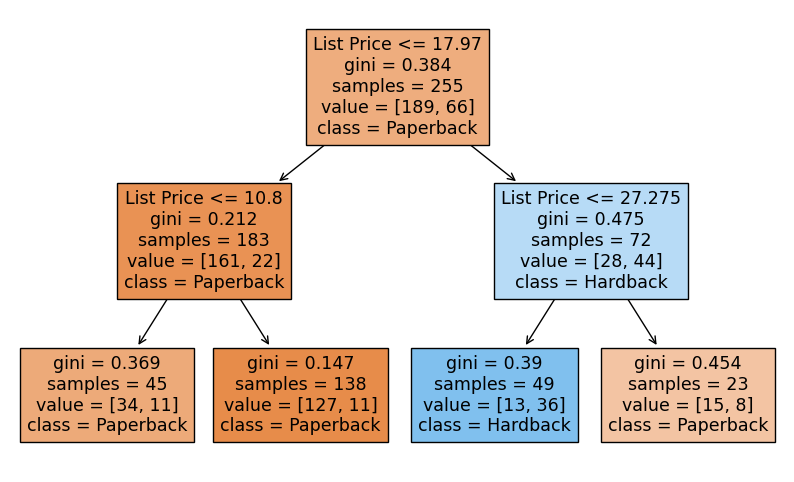

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Subset columns of interest
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Use .loc[] to safely modify columns and convert data types
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Step 1: 80/20 split with random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Step 2: Define features and target using the training data
X_train = ab_reduced_noNaN_train[["List Price"]]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]  # 1 = Hardback, 0 = Paperback

# Step 3: Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Plot the decision tree using matplotlib (tree.plot_tree)
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardback"], filled=True)
plt.show()



**QUESTION 6**

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import numpy as np

# Assuming the train-test split has already been done
# Now, let's predict using both classifiers

# Predictions for both models
y_pred_clf = clf.predict(X_test[['List Price']])  # Using List Price for clf
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])  # Using NumPages, Thick, and List Price for clf2

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extracting TP, TN, FP, FN for both models
TP_clf, FP_clf, FN_clf, TN_clf = cm_clf.ravel()
TP_clf2, FP_clf2, FN_clf2, TN_clf2 = cm_clf2.ravel()

# Calculate sensitivity, specificity, and accuracy for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Calculate sensitivity, specificity, and accuracy for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print results for clf
print(f"Classifier 1 (clf) - Sensitivity: {np.round(sensitivity_clf, 3)}, Specificity: {np.round(specificity_clf, 3)}, Accuracy: {np.round(accuracy_clf, 3)}")

# Print results for clf2
print(f"Classifier 2 (clf2) - Sensitivity: {np.round(sensitivity_clf2, 3)}, Specificity: {np.round(specificity_clf2, 3)}, Accuracy: {np.round(accuracy_clf2, 3)}")


Classifier 1 (clf) - Sensitivity: 0.778, Specificity: 0.87, Accuracy: 0.844
Classifier 2 (clf2) - Sensitivity: 0.789, Specificity: 0.889, Accuracy: 0.859


**QUESTION 7**

The differences between the two confusion matrices are likely due to the features used in each model. In the first case, the model is using only `List Price` as a predictor, while in the second case, it includes `NumPages`, `Thick`, and `List Price`. Including more features provides the model with additional information, which can lead to better predictions. This is because the second model (`clf2`) has access to a broader set of attributes, potentially making it more accurate and better at distinguishing between the classes. As a result, the confusion matrix for `clf2` should have fewer misclassifications (higher precision and recall) compared to the first model.

The confusion matrices for `clf` and `clf2` (from the previous analysis) are considered better because they are evaluated on a **separate test set** (`X_test`), which provides a more reliable indication of how the model generalizes to unseen data. The training set used in the confusion matrices above might lead to **overfitting**, where the models perform well on the training data but fail to generalize effectively to new data.

**Here's a summary of our conversation:**

1. **Exploratory Data Analysis (EDA)**:
   - We began by working with the Amazon books dataset, which involved preprocessing steps such as removing unnecessary columns, handling missing data, and converting column types.
   - You were guided through splitting the data into training and testing sets, making sure to set a random seed for reproducibility.

2. **Decision Tree Classification**:
   - We discussed how to fit a DecisionTreeClassifier (`clf`) and visualize it using both `plot_tree` and `graphviz`.
   - The first classification model used only the `List Price` feature, while the second model (`clf2`) incorporated `NumPages`, `Thick`, and `List Price`.
   - We trained both models on the dataset, visualized the decision tree, and explained how predictions were made based on the decision tree structure.

3. **Evaluation**:
   - You were instructed on how to compute and interpret confusion matrices for both models.
   - We calculated accuracy, sensitivity, and specificity for each classifier and discussed their implications.
   - You ran into issues with data mismatches and feature selection, and after troubleshooting, we revisited training the models with the correct feature sets and ensured the models were properly evaluated on the test set.

4. **Final Confusion Matrices and Model Comparison**:
   - We compared confusion matrices using both the `List Price` alone and a broader set of features.
   - We concluded that using more features (as in `clf2`) typically results in better performance, though evaluation on the test set is crucial to avoid overfitting.

This process helped you understand how different features impact model performance and the importance of evaluating models on test data to avoid overfitting.

In [ ]:
URL=https://chatgpt.com/share/673f86f6-e888-8007-a5b6-9b29f738a500